# Homework 2
*This notebook includes both coding and written questions. Please hand in this notebook file with all the outputs and your answers to the written questions.*

This assignment covers linear filters, convolution and correlation.

In [36]:
# Setup
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from time import time
from skimage import io


%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Part 1: Convolutions
### 1.1 Commutative Property (5 points)
Recall that the convolution of an image $f:\mathbb{R}^2\rightarrow \mathbb{R}$ and a kernel $h:\mathbb{R}^2\rightarrow\mathbb{R}$ is defined as follows:
$$(f*h)[m,n]=\sum_{i=-\infty}^\infty\sum_{j=-\infty}^\infty f[i,j]\cdot h[m-i,n-j]$$

Or equivalently,
\begin{align}
(f*h)[m,n] &= \sum_{i=-\infty}^\infty\sum_{j=-\infty}^\infty h[i,j]\cdot f[m-i,n-j]\\
&= (h*f)[m,n]
\end{align}

Prove that the convolution operator is commutative: $f*h = h*f$.

**Your Answer:** *Write your solution in this markdown cell. You can write your equations in [LaTex equations](http://jupyter-notebook.readthedocs.io/en/latest/examples/Notebook/Typesetting%20Equations.html),or paste a photo of your solution（Double click current cell, find "Edit->Insert Image"）*
\begin{align}
& for\ \forall m\ \forall n \\
& (f * h)[m, n] = \sum_{i=-\infty}^{\infty}\sum_{j=-\infty}^{\infty}f[i, j]h[m-i, n-j]\\
& define\ t=m-i, l=n-j\ and\ make\ a\ substitution \\
& (f * h)[m, n]  = \sum_{t=\infty}^{-\infty}\sum_{l=\infty}^{-\infty}f[m-t, n-l]h[t, l]\\
&                = \sum_{t=-\infty}^{\infty}\sum_{l=-\infty}^{\infty}h[t, l]f[m-t, n-l]\\
&                = (h * f)[m, n]
\end{align}


### 1.2 Shift Invariance (5 points)
Let $f$ be a function $\mathbb{R}^2\rightarrow\mathbb{R}$. Consider a system $f\xrightarrow{s}g$, where $g=(f*h)$ with some kernel $h:\mathbb{R}^2\rightarrow\mathbb{R}$. Also consider functions $f'[m,n] = f[m-m_0, n-n_0]$ and $g'[m,n] = g[m-m_0, n-n_0]$.  

Show that $S$ defined by any kernel $h$ is a shift invariant system by proving that $g' = (f'*h)$.

**Your Answer:** *Write your solution in this markdown cell. You can write your equations in [LaTex equations](http://jupyter-notebook.readthedocs.io/en/latest/examples/Notebook/Typesetting%20Equations.html),or paste a photo of your solution（Double click current cell, find "Edit->Insert Image"）*
\begin{align}
(f'* h)[m, n] & = (h *f')[m, n] = \sum_{i=-\infty}^{infty}\sum_{j=-\infty}^{\infty}h[i, j]f'[m-i, n-j]\\
& = \sum_{i=-\infty}^{\infty}\sum_{j=-\infty}^{\infty}h[i, j]f[m-i-m_0, n-j-n_0]\\
& = \sum_{i=-\infty}^{\infty}\sum_{j=-\infty}^{\infty}h[i, j]f[(m-m_0)-i, (n-n_0)-j]\\
& = (h * f)[m-m_0, n-n_0]\\
& = g[m-m_0, n-n_0]\\
& = g'[m, n]
\end{align}


### 1.3 Implementation (30 points)

In this section, you will implement two versions of convolution:
- `conv_nested`
- `conv_fast`

First, run the code cell below to load the image to work with.

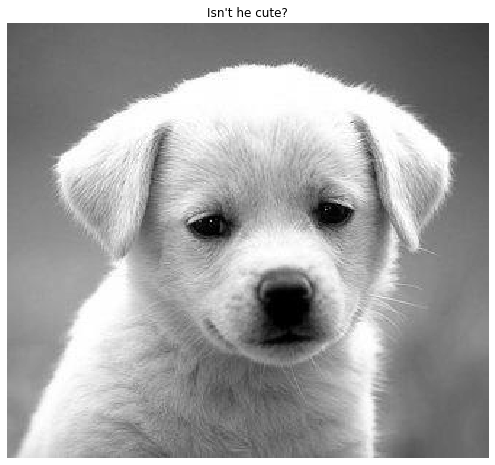

In [37]:
# Open image as grayscale
img = io.imread('dog.jpg', as_gray=True)

# Show image
plt.imshow(img)
plt.axis('off')
plt.title("Isn't he cute?")
plt.show()

Now, implement the function **`conv_nested`** in **`filters.py`**. This is a naive implementation of convolution which uses 4 nested for-loops. It takes an image $f$ and a kernel $h$ as inputs and **outputs the convolved image $(f*h)$ that has the same shape as the input image ($f[i][j]$ in the formula can be ignored or treated as 0 in implementation, if $i$ or $j$ exceed the range of image)**. This implementation should take a few seconds to run.

- Hint: **the kernel index in formula $(f*h)[m,n]=\sum_{i=-\infty}^\infty\sum_{j=-\infty}^\infty f[i,j]\cdot h[m-i,n-j]$ (h is the kernel) is different from kernel index in implementation, you should watch out when you write code !!!** 
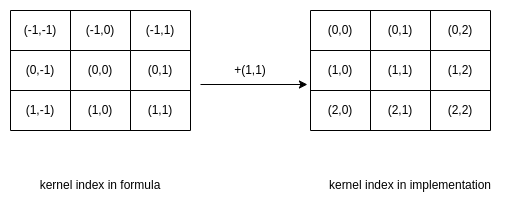

We'll first test your `conv_nested` function on a simple input.

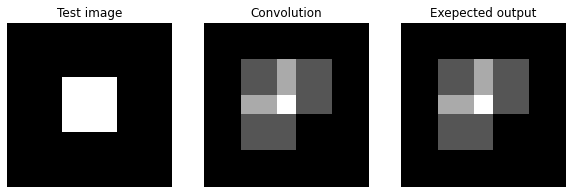

In [38]:
from filters import conv_nested

# Simple convolution kernel.
kernel = np.array(
[
    [1,0,1],
    [0,0,0],
    [1,0,0]
])

# Create a test image: a white square in the middle
test_img = np.zeros((9, 9))
test_img[3:6, 3:6] = 1
#print(test_img)
# Run your conv_nested function on the test image
test_output = conv_nested(test_img, kernel)
#print(test_output)

# Build the expected output
expected_output = np.zeros((9, 9))
expected_output[2:7, 2:7] = 1
expected_output[5:, 5:] = 0
expected_output[4, 2:5] = 2
expected_output[2:5, 4] = 2
expected_output[4, 4] = 3
#print(expected_output)

# Plot the test image
plt.subplot(1,3,1)
plt.imshow(test_img)
plt.title('Test image')
plt.axis('off')

# Plot your convolved image
plt.subplot(1,3,2)
plt.imshow(test_output)
plt.title('Convolution')
plt.axis('off')

# Plot the exepected output
plt.subplot(1,3,3)
plt.imshow(expected_output)
plt.title('Exepected output')
plt.axis('off')
plt.show()

# Test if the output matches expected output
assert np.max(test_output - expected_output) < 1e-10, "Your solution is not correct."

Now let's test your `conv_nested` function on a real image.

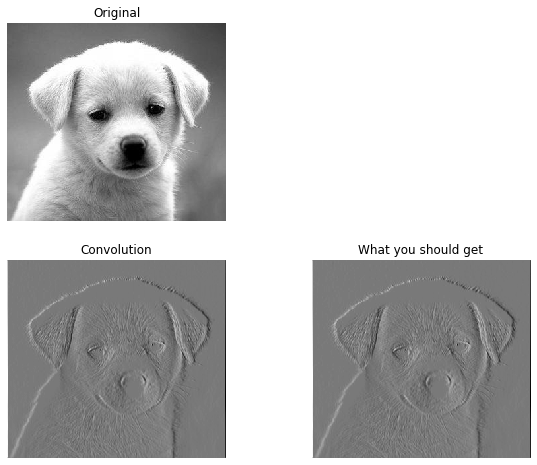

In [39]:
from filters import conv_nested

# Simple convolution kernel.
# Feel free to change the kernel to see different outputs.
kernel = np.array(
[
    [1,0,-1],
    [2,0,-2],
    [1,0,-1]
])

out = conv_nested(img, kernel)

# Plot original image
plt.subplot(2,2,1)
plt.imshow(img)
plt.title('Original')
plt.axis('off')

# Plot your convolved image
plt.subplot(2,2,3)
plt.imshow(out)
plt.title('Convolution')
plt.axis('off')

# Plot what you should get
solution_img = io.imread('convolved_dog.png', as_gray=True)
plt.subplot(2,2,4)
plt.imshow(solution_img)
plt.title('What you should get')
plt.axis('off')

plt.show()

Let us implement a more efficient version of convolution using array operations in numpy. As shown in the lecture, a convolution can be considered as a sliding window that computes sum of the pixel values weighted by the flipped kernel. The faster version will i) zero-pad an image, ii) flip the kernel horizontally and vertically, and iii) compute weighted sum of the neighborhood at each pixel.

First, implement the function **`zero_pad`** in **`filters.py`**.


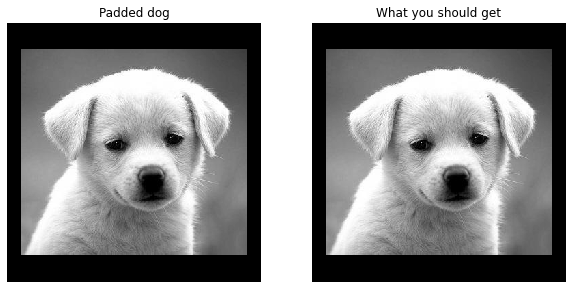

In [40]:
from filters import zero_pad

pad_width = 20 # width of the padding on the left and right
pad_height = 40 # height of the padding on the top and bottom

padded_img = zero_pad(img, pad_height, pad_width)

# Plot your padded dog
plt.subplot(1,2,1)
plt.imshow(padded_img)
plt.title('Padded dog')
plt.axis('off')

# Plot what you should get
solution_img = io.imread('padded_dog.jpg', as_gray=True)
plt.subplot(1,2,2)
plt.imshow(solution_img)
plt.title('What you should get')
plt.axis('off')

plt.show()

Next, complete the function **`conv_fast`** in **`filters.py`** using `zero_pad`. Run the code below to compare the outputs by the two implementations. `conv_fast` should run noticeably faster than `conv_nested`.  


conv_nested: took 0.899943 seconds.
conv_fast: took 0.510857 seconds.


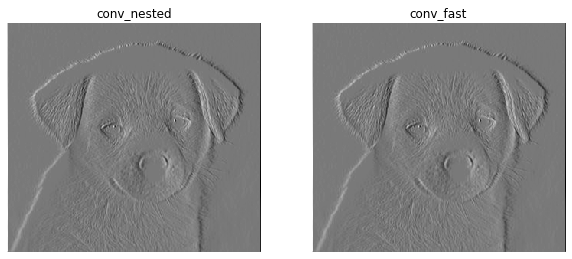

In [41]:
from filters import conv_fast

t0 = time()
out_fast = conv_fast(img, kernel)
t1 = time()
out_nested = conv_nested(img, kernel)
t2 = time()

# Compare the running time of the two implementations
print("conv_nested: took %f seconds." % (t2 - t1))
print("conv_fast: took %f seconds." % (t1 - t0))

# Plot conv_nested output
plt.subplot(1,2,1)
plt.imshow(out_nested)
plt.title('conv_nested')
plt.axis('off')

# Plot conv_fast output
plt.subplot(1,2,2)
plt.imshow(out_fast)
plt.title('conv_fast')
plt.axis('off')
np.savetxt("tmp", out_fast - out_nested)
# Make sure that the two outputs are the same
if not (np.max(out_fast - out_nested) < 1e-10):
    print("Different outputs! Check your implementation.")

---
## Part 2: Cross-correlation

Cross-correlation of an image $f$ with a template $g$ is defined as follows:
$$(g ** f)[m,n]=\sum_{i=-\infty}^\infty\sum_{j=-\infty}^\infty g[i,j]\cdot f[m + i,n + j]$$

### 2.1 Template Matching with Cross-correlation (12 points)
Suppose that you are a clerk at a grocery store. One of your responsibilites is to check the shelves periodically and stock them up whenever there are sold-out items. You got tired of this laborious task and decided to build a computer vision system that keeps track of the items on the shelf.

Cross-correlation can be used for template matching: a template $g$ is multiplied with regions of a larger image $f$ to measure how similar each region is to the template.

The template of a product (`template.jpg`) and the image of shelf (`shelf.jpg`) is provided. We will use cross-correlation to find the product in the shelf.

Implement **`cross_correlation`** function in **`filters.py`** and run the code below.

*- Hint: you may use the `conv_fast` function you implemented in the previous question.*

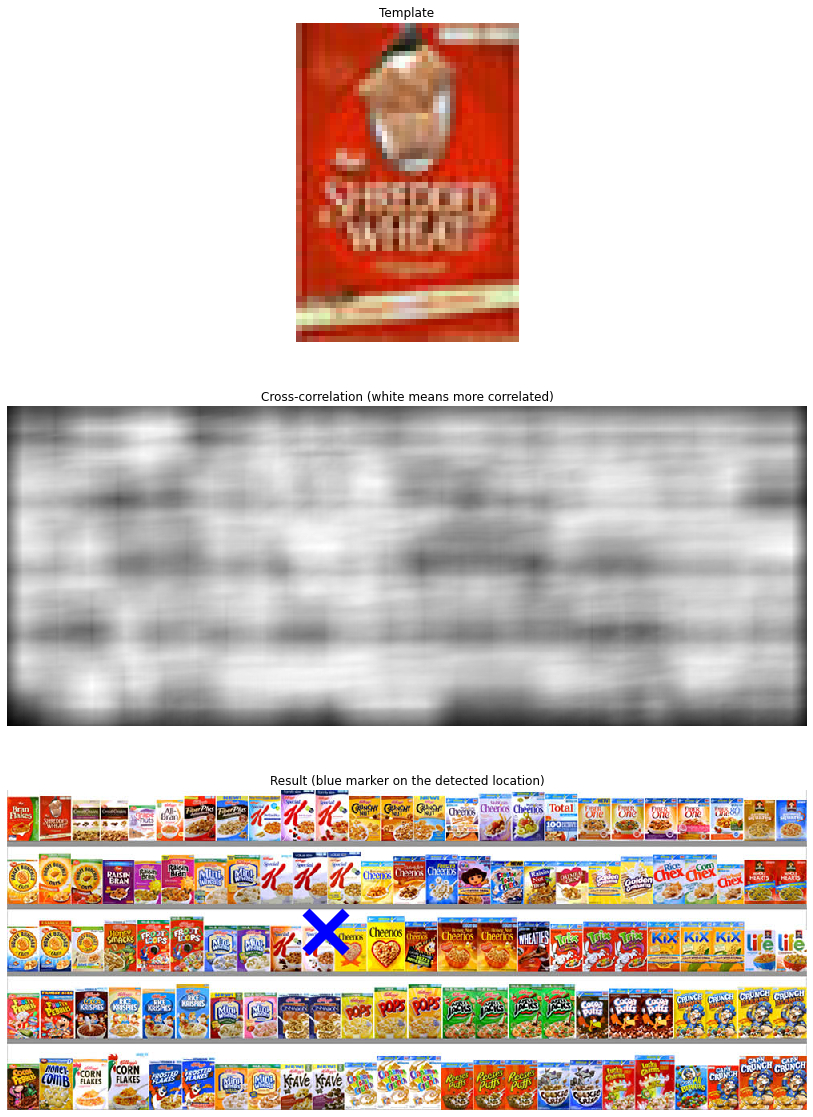

In [42]:
from filters import cross_correlation

# Load template and image in grayscale
img = io.imread('shelf.jpg')
img_gray = io.imread('shelf.jpg', as_gray=True)
temp = io.imread('template.jpg')
temp_gray = io.imread('template.jpg', as_gray=True)

# Perform cross-correlation between the image and the template
out = cross_correlation(img_gray, temp_gray)

# Find the location with maximum similarity
y,x = (np.unravel_index(out.argmax(), out.shape))

# Display product template
plt.figure(figsize=(25,20))
plt.subplot(3, 1, 1)
plt.imshow(temp)
plt.title('Template')
plt.axis('off')

# Display cross-correlation output
plt.subplot(3, 1, 2)
plt.imshow(out)
plt.title('Cross-correlation (white means more correlated)')
plt.axis('off')

# Display image
plt.subplot(3, 1, 3)
plt.imshow(img)
plt.title('Result (blue marker on the detected location)')  # the detected location is expected to be wrong.
plt.axis('off')

# Draw marker at detected location
plt.plot(x, y, 'bx', ms=40, mew=10)
plt.show()

#### Interpretation
How does the output of cross-correlation filter look? Explain what problems there might be with using a raw template as a filter.

**Your Answer:** *Write your solution in this markdown cell.*
The filter is a gray image. 
The problem is that when we use cross correlation to match the template, the lighter area in the picture will get a larger value, which will be treated as a more similar area so that the result will be incorrect.

---
### 2.2 Zero-mean cross-correlation (6 points)
A solution to this problem is to subtract the mean value of the template so that it has zero mean.

Implement **`zero_mean_cross_correlation`** function in **`filters.py`** and run the code below.

**If your implementation is correct, you should see the blue cross centered over the correct cereal box.**

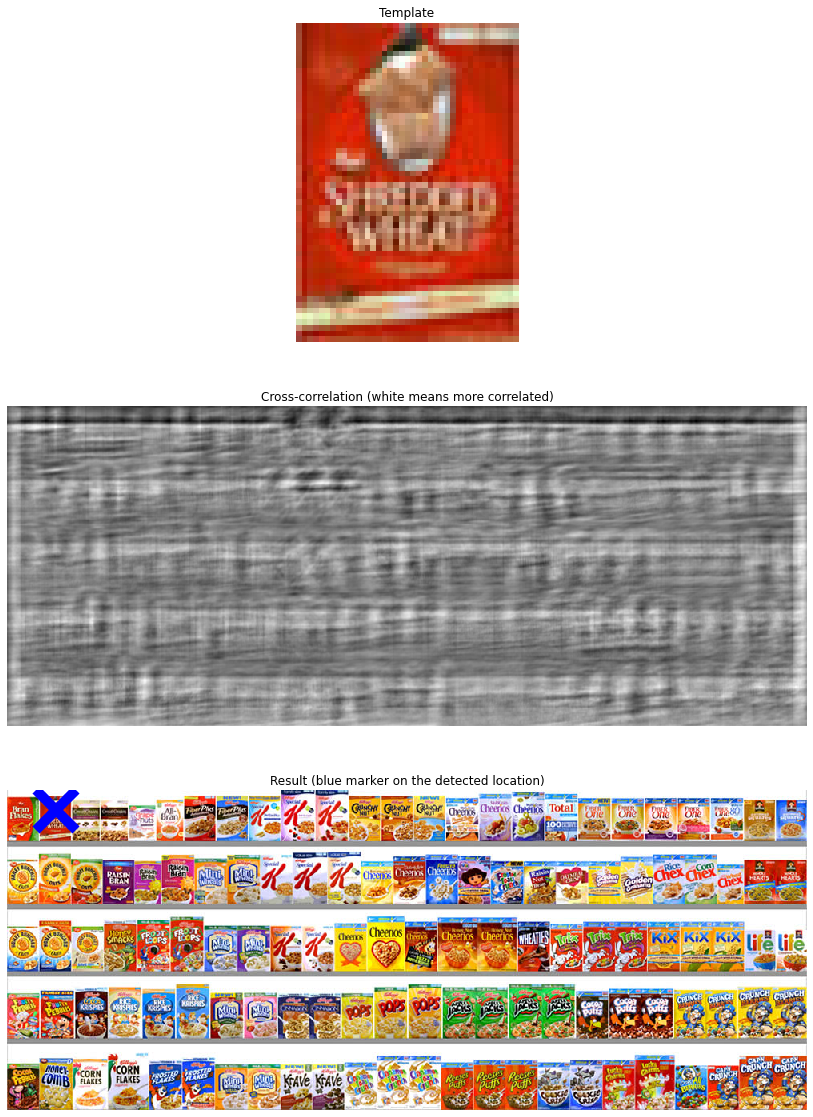

In [43]:
from filters import zero_mean_cross_correlation

# Perform cross-correlation between the image and the template
out = zero_mean_cross_correlation(img_gray, temp_gray)

# Find the location with maximum similarity
y,x = np.unravel_index(out.argmax(), out.shape)

# Display product template
plt.figure(figsize=(30,20))
plt.subplot(3, 1, 1)
plt.imshow(temp)
plt.title('Template')
plt.axis('off')

# Display cross-correlation output
plt.subplot(3, 1, 2)
plt.imshow(out)
plt.title('Cross-correlation (white means more correlated)')
plt.axis('off')

# Display image
plt.subplot(3, 1, 3)
plt.imshow(img)
plt.title('Result (blue marker on the detected location)')
plt.axis('off')

# Draw marker at detected location
plt.plot(x, y, 'bx', ms=40, mew=10)
plt.show()


You can also determine whether the product is present with appropriate scaling and thresholding.

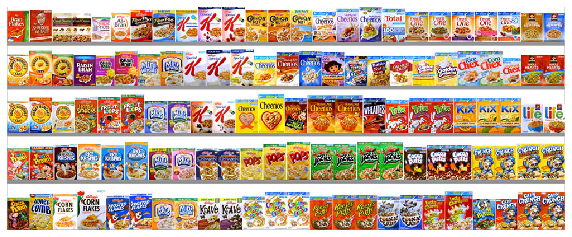

The product is not on the shelf


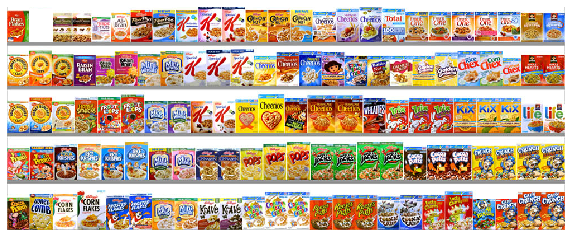

The product is not on the shelf


In [44]:
def check_product_on_shelf(shelf, product):
    out = zero_mean_cross_correlation(shelf, product)
    
    # Scale output by the size of the template
    out = out / float(product.shape[0]*product.shape[1])
    
    # Threshold output (this is arbitrary, you would need to tune the threshold for a real application)
    out = out > 0.025
    
    if np.sum(out) > 0:
        print('The product is on the shelf')
    else:
        print('The product is not on the shelf')

# Load image of the shelf without the product
img2 = io.imread('shelf_soldout.jpg')
img2_gray = io.imread('shelf_soldout.jpg', as_gray=True)

plt.imshow(img)
plt.axis('off')
plt.show()
check_product_on_shelf(img_gray, temp_gray)

plt.imshow(img2)
plt.axis('off')
plt.show()
check_product_on_shelf(img2_gray, temp_gray)

---
### 2.3 Normalized Cross-correlation (12 points)
One day the light near the shelf goes out and the product tracker starts to malfunction. The `zero_mean_cross_correlation` is not robust to change in lighting condition. The code below demonstrates this.

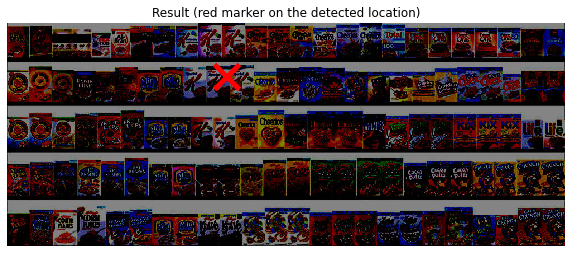

In [45]:
from filters import normalized_cross_correlation

# Load image
img = io.imread('shelf_dark.jpg')
img_gray = io.imread('shelf_dark.jpg', as_gray=True)

# Perform cross-correlation between the image and the template
out = zero_mean_cross_correlation(img_gray, temp_gray)

# Find the location with maximum similarity
y, x = np.unravel_index(out.argmax(), out.shape)

# Display image
plt.imshow(img)
plt.title('Result (red marker on the detected location)')
plt.axis('off')

# Draw marker at detcted location
plt.plot(x, y, 'rx', ms=25, mew=5)
plt.show()

A solution is to normalize the pixels of the image and template at every step before comparing them. This is called **normalized cross-correlation**.

The mathematical definition for normalized cross-correlation of $f$ and template $g$ is:
$$(g \star f)[m,n]=\sum_{i,j} \frac{g[i, j]-\overline{g}}{\sigma_g} \cdot \frac{f[m + i, n + j]-\overline{f_{m,n}}}{\sigma_{f_{m,n}}}$$

where:
- $f_{m,n}$ is the patch image at position $(m,n)$
- $\overline{f_{m,n}}$ is the mean of the patch image $f_{m,n}$
- $\sigma_{f_{m,n}}$ is the standard deviation of the patch image $f_{m,n}$ 
- $\overline{g}$ is the mean of the template $g$
- $\sigma_g$ is the standard deviation of the template $g$

Implement **`normalized_cross_correlation`** function in **`filters.py`** and run the code below.

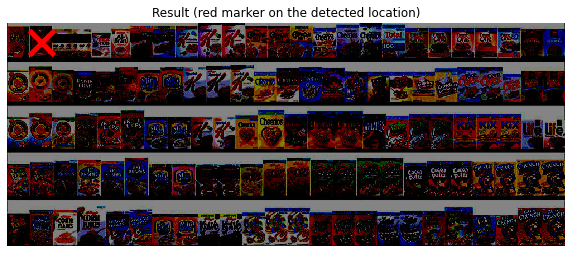

In [46]:
from filters import normalized_cross_correlation

# Perform normalized cross-correlation between the image and the template
out = normalized_cross_correlation(img_gray, temp_gray)

# Find the location with maximum similarity
y, x = np.unravel_index(out.argmax(), out.shape)

# Display image
plt.imshow(img)
plt.title('Result (red marker on the detected location)')
plt.axis('off')

# Draw marker at detcted location
plt.plot(x, y, 'rx', ms=25, mew=5)
plt.show()